In [1]:
import os, sys
os.chdir('..')
os.getcwd()

'c:\\Users\\user\\Documents\\Python\\MOKEpy'

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
np.round(1.1).astype(int)

1

In [5]:
np.linspace(-5, 5, 11)

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [12]:
a = np.arange(10)
b= 20+np.arange(20)
a = b[-10:]
a

array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39])

In [26]:
np.round((15.0593 - 14.944 )*10000).astype(int)

1153

In [103]:
data = np.load('debug.npy')

(-0.0005, 0.0005)

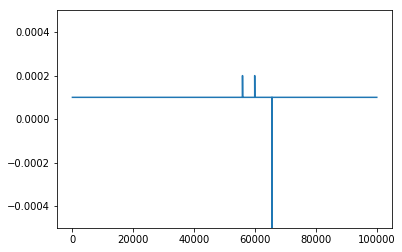

In [133]:
plt.plot(data[1:,0] - data[:-1,0])
plt.ylim([-0.0005, 0.0005])

In [161]:
result = pd.DataFrame(data[:20,1:], index=pd.Index(data[:20,0], name='t'))
result

,0,1
t,,
212.9689,0.009038,0.008380
212.9690,0.008380,0.008380
212.9691,0.007722,0.008380
212.9692,0.008709,0.008709
212.9693,0.009038,0.009038
212.9694,0.008380,0.008380
212.9695,0.008380,0.007722
212.9696,0.009696,0.009038
212.9697,0.008051,0.007722


In [162]:
result = pd.concat((result.iloc[:1], result))
current_indx = np.array(result.index)
current_indx[0] -= 1/rate
result.index = current_indx
result

,0,1
212.9688,0.009038,0.008380
212.9689,0.009038,0.008380
212.9690,0.008380,0.008380
212.9691,0.007722,0.008380
212.9692,0.008709,0.008709
212.9693,0.009038,0.009038
212.9694,0.008380,0.008380
212.9695,0.008380,0.007722
212.9696,0.009696,0.009038
212.9697,0.008051,0.007722


In [142]:
result

,0,1
0.0000,0.009038,NaN
1.0000,0.008380,NaN
212.9689,0.009038,0.008380
212.9690,0.008380,0.008380
212.9691,0.007722,0.008380
212.9692,0.008709,0.008709
212.9693,0.009038,0.009038
212.9694,0.008380,0.008380
212.9695,0.008380,0.007722
212.9696,0.009696,0.009038


In [110]:
final_data_indx = 65548
samples_in_memory = 100000
data_stream = data

last_data_time = data_stream[final_data_indx, 0]
start_data_indx = (final_data_indx
                    + 1) % samples_in_memory
start_data_time = data_stream[start_data_indx, 0]

In [115]:
data_stream[54411:64509,0]

array([218.41  , 218.4101, 218.4102, ..., 219.4197, 219.4198, 219.4199])

In [121]:
end_time = -1
rate = 10000
start_time = 218.410

# if still starting up, change the start index to 0
if start_data_time <= 0:
    start_data_indx = 0
# if last_data_time == 0 or start_time > last_data_time or (end_time > 0 and end_time <= start_data_time):
#     # have not started acquiring data yet, the start time is bigger than the latest time,
#     # or end time smaller than the first time in memory; return empty
#     self.data_lock.release()
#     return pd.DataFrame(columns=self.ports.values())
# find the end index
if end_time < 0 or end_time > last_data_time:
    # return up until the latest time in the memory
    indx_end = final_data_indx
else:
    delta_indx = np.round((last_data_time - end_time) *
                            rate).astype(int)
    indx_end = (final_data_indx -
                delta_indx) % samples_in_memory
# if start time negative, assume it's the current time - wanted start time
if start_time < 0:
    start_time = last_data_time + start_time
# find the start index
if start_time <= start_data_time:
    indx_start = start_data_indx
else:
    delta_indx = np.round(
        (last_data_time - start_time) * rate).astype(int)
    indx_start = (final_data_indx
                    - delta_indx) % samples_in_memory



In [127]:
final_data_indx - delta_indx

54409

In [125]:
delta_indx

11139

In [122]:
indx_start

54409

In [ ]:
# get the data and format it in the pandas dataframe
if indx_start < indx_end:
    selected_data = self.data_stream[indx_start:indx_end, :]
elif indx_start > indx_end:
    selected_data = np.vstack(
        (self.data_stream[indx_start:, :], self.data_stream[:indx_end, :]))
else:
    selected_data = self.data_stream[indx_start, :][np.newaxis, :]

In [18]:
off_max = 30
n_offsets=31
np.linspace(-off_max, off_max, n_offsets)

array([-30., -28., -26., -24., -22., -20., -18., -16., -14., -12., -10.,
        -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.,  12.,
        14.,  16.,  18.,  20.,  22.,  24.,  26.,  28.,  30.])

In [20]:
b = a.take(range(3, 8), axis=0, mode='wrap')
b = 0.5
a

array([[0.22917851, 0.69731995, 0.74022627],
       [0.25205738, 0.09283917, 0.37150888],
       [0.90344594, 0.54709084, 0.58541893],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ]])

In [6]:
a

array([[0.22917851, 0.69731995, 0.74022627],
       [0.25205738, 0.09283917, 0.37150888],
       [0.90344594, 0.54709084, 0.58541893],
       [0.94939198, 0.91616165, 0.62688154],
       [0.64891441, 0.48298976, 0.54923956]])

In [21]:
x = np.arange(6)

In [22]:
x[:3]

array([0, 1, 2])

In [6]:
x = pd.DataFrame(np.random.rand(5, 2), columns=['a', 'b'])

In [11]:
x['b'].iloc[-1]

0.774865386187518

In [19]:

len(np.array(data_out[0]))

TypeError: len() of unsized object

In [ ]:
p = pd.DataFrame(dd)

In [21]:
data_out = np.arange(3)

last_data = pd.DataFrame(data_out[1:][np.newaxis, :], columns=['a', 'b'], index=np.array([data_out[0],]))

In [23]:
last_data[['b', 'a']]

,b,a
0,2,1


In [30]:
['a',] in ['b', 'a']

False

In [129]:
p

,0,1,2
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4


In [132]:
class Test:
    def __init__(self, t):
        self.t = t

    @property
    def t(self):
        print('getting')
        return self._t

    @t.setter
    def t(self, value):
        print('setting')
        self._t = value

In [133]:
ts = Test(5)

setting


NameError: name 't' is not defined

In [130]:
p = pd.DataFrame(np.array([np.arange(5),]*3).T)
smooth_window=5
n_points=3
step = int(np.ceil(p.shape[0] / n_points))
p.rolling(
        smooth_window, min_periods=1, center=False).mean().iloc[::step]

,0,1,2
0,0.0,0.0,0.0
2,1.0,1.0,1.0
4,2.0,2.0,2.0


In [126]:
n_data = 10
step = 100
x = np.arange(n_data)
x[(n_data-1)%step::step]

array([9])

In [117]:
np.ceil(n_data/step)

1.0

In [58]:
x = np.random.rand(1000, 3)
x[:,0] = np.arange(1000)

bucket_size=100
xfilt = np.apply_along_axis(lambda m:np.mean(m[:len(m)-(len(m)%bucket_size)].reshape(-1, bucket_size), axis=1), axis=0, arr=x)

In [59]:
xfilt

array([[4.95000000e+01, 5.51703166e-01, 4.10669483e-01],
       [1.49500000e+02, 5.34701526e-01, 4.98911558e-01],
       [2.49500000e+02, 4.95003700e-01, 4.96722157e-01],
       [3.49500000e+02, 5.07399357e-01, 5.56496234e-01],
       [4.49500000e+02, 4.85558013e-01, 4.59314422e-01],
       [5.49500000e+02, 4.87908098e-01, 4.98692127e-01],
       [6.49500000e+02, 5.14441308e-01, 5.30306255e-01],
       [7.49500000e+02, 4.62264938e-01, 4.59345614e-01],
       [8.49500000e+02, 5.05470748e-01, 5.21135483e-01],
       [9.49500000e+02, 4.82939043e-01, 4.85690510e-01]])

In [65]:
np.vstack((np.empty((0, 3)), x))

array([[0.00000000e+00, 1.31622598e-01, 4.73014261e-01],
       [1.00000000e+00, 5.40623056e-01, 6.39488326e-01],
       [2.00000000e+00, 9.62331801e-01, 2.94248042e-01],
       ...,
       [9.97000000e+02, 1.21619056e-01, 1.32536291e-01],
       [9.98000000e+02, 7.15184726e-01, 7.27437092e-01],
       [9.99000000e+02, 5.03206355e-01, 8.40578500e-01]])

In [45]:
m[:len(m)-(len(m)%3)]

array([0.02381403, 0.2130867 , 0.31408965])

In [53]:
np.mean(x[:3,0])

0.6292923847300805

In [5]:
samples_in_memory = 8
data = np.linspace(samples_in_memory)
final_data_indx = 3
np_result = -np.ones(4)
n_samples = len(np_result)
new_final_indx = (final_data_indx + n_samples)%flushing_samples

TypeError: _linspace_dispatcher() missing 1 required positional argument: 'stop'

In [23]:
x[3:]

array([3, 4, 5])

In [2]:
from inspect import getmembers, isfunction, ismethod
import pkgutil
import experiments.custom_loop as custom

In [9]:
funs = [a for a in getmembers(custom, isfunction) if a[0][-1]=='_']
funs

[('loop_map_',
  <function experiments.custom_loop.loop_map.loop_map_(moke, stop_event=None, loop_widget=None, file_name=None, folder=None)>),
 ('test_', <function experiments.custom_loop.loop_map.test_()>)]

In [10]:
custom.deep_reload(custom)

In [11]:
funs[-1][-1]()

ello


In [6]:
for importer, modname, ispkg in pkgutil.walk_packages(path='experiments.custom_loop', prefix=__name__ + '.'):
    print(importer, modname, ispkg)

FileFinder('.') __main__.control True
FileFinder('.') __main__.data True
FileFinder('.') __main__.display True
FileFinder('.') __main__.experiments True
FileFinder('.') __main__.gui True
FileFinder('.') __main__.test_script False
FileFinder('.') __main__.testing True
